# NK annotations by Pfefferle et al. 2019

Sample description:
- Easigenomics dataset
- Aplastic anemia
- follow up
- BM blasts = 0 %

### Reference:
Pfefferle, A., Netskar, H., Ask, E. H., Lorenz, S., Goodridge, J. P., Sohlberg, E., Clancy, T., & Malmberg, K.-J. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657

NK cells are traditionally divided based on CD56 expression into CD56bright and CD56dim sub-populations, which have distinct functional properties. CD56bright NK cells are considered as immature precursors of CD56dim  NK cells and have an immunoregulatory role, while CD56dim NK cells express CD16 and have more cytotoxic properties. CD56bright Nk cells are the most immature, while adaptive NK cells are the most mature forms of NK cells. In this paper, 5 clusters of NK cells were defined. 
- Canonical differentiation markers for NK cells were NCAM (CD56), KLRC2 (NKG2C), SELL (CD62L), CD7 and FCGR3A (CD16). 

NK cell markers:

- is_nk = ["CD3E", "KLRB1", "KLRD1", "GZMB", "NCAM1"]
- nk_cd56_bright = ["NCAM1", "KLRC1", "MYC", "BACH2"]
- nk_cd56_dim = ["FCERG3A", "PRDM1", "ZEB2", "MAF"]
- nk_adaptive= ["KLRC2", "KLF2"]


In [70]:
is_nk = ["CD3E", "KLRB1", "KLRD1", "GZMB", "NCAM1"]
nk_cd56_bright = ["NCAM1", "KLRC1", "MYC", "BACH2"]
nk_cd56_dim = ["FCERG3A", "PRDM1", "ZEB2", "MAF"]
nk_adaptive= ["KLRC2", "KLF2"]

#Own addition
canonical_markers= ['NCAM1', 'KLRC2', 'SELL', 'CD7', 'FCGR3A']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


In [38]:
#all datasets
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [39]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [40]:
adata1=adata.copy()

In [41]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [42]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [8]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

## NK cell markers

In [71]:
is_nk = ["CD3E", "KLRB1", "KLRD1", "GZMB", "NCAM1"]
nk_cd56_bright = ["NCAM1", "KLRC1", "MYC", "BACH2"]
nk_cd56_dim = ["FCERG3A", "PRDM1", "ZEB2", "MAF"]
nk_adaptive= ["KLRC2", "KLF2"]

#Own addition based on the paper
canonical_markers= ['NCAM1', 'NKG2C', 'SELL', 'CD7', 'FCGR3A']

In [87]:
listOfGenes= is_nk

is_nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        is_nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD3E Yes
KLRB1 No
KLRD1 No
GZMB Yes
NCAM1 No
['CD3E', 'KLRB1', 'KLRD1', 'GZMB', 'NCAM1']


In [88]:
listOfGenes=nk_cd56_bright

nk_cd56_bright=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_cd56_bright.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

NCAM1 No
KLRC1 No
MYC Yes
BACH2 Yes
['NCAM1', 'KLRC1', 'MYC', 'BACH2']


In [89]:
listOfGenes=nk_cd56_dim

nk_cd56_dim=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_cd56_dim.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

FCERG3A No
PRDM1 Yes
ZEB2 Yes
MAF No
['FCERG3A', 'PRDM1', 'ZEB2', 'MAF']


In [90]:
listOfGenes=nk_adaptive
nk_adaptive=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_adaptive.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

KLRC2 No
KLF2 Yes
['KLRC2', 'KLF2']


In [91]:
listOfGenes=canonical_markers
canonical_markers=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        canonical_markers.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

SELL Yes
['SELL']


In [92]:
#list of lists into a one list

pfefferle_markers=[is_nk, nk_cd56_bright, nk_cd56_dim, nk_adaptive]
pfefferle_markers = list(np.concatenate(pfefferle_markers).flat)

## UMAPs

In [78]:
sc.settings.set_figure_params(dpi=150)

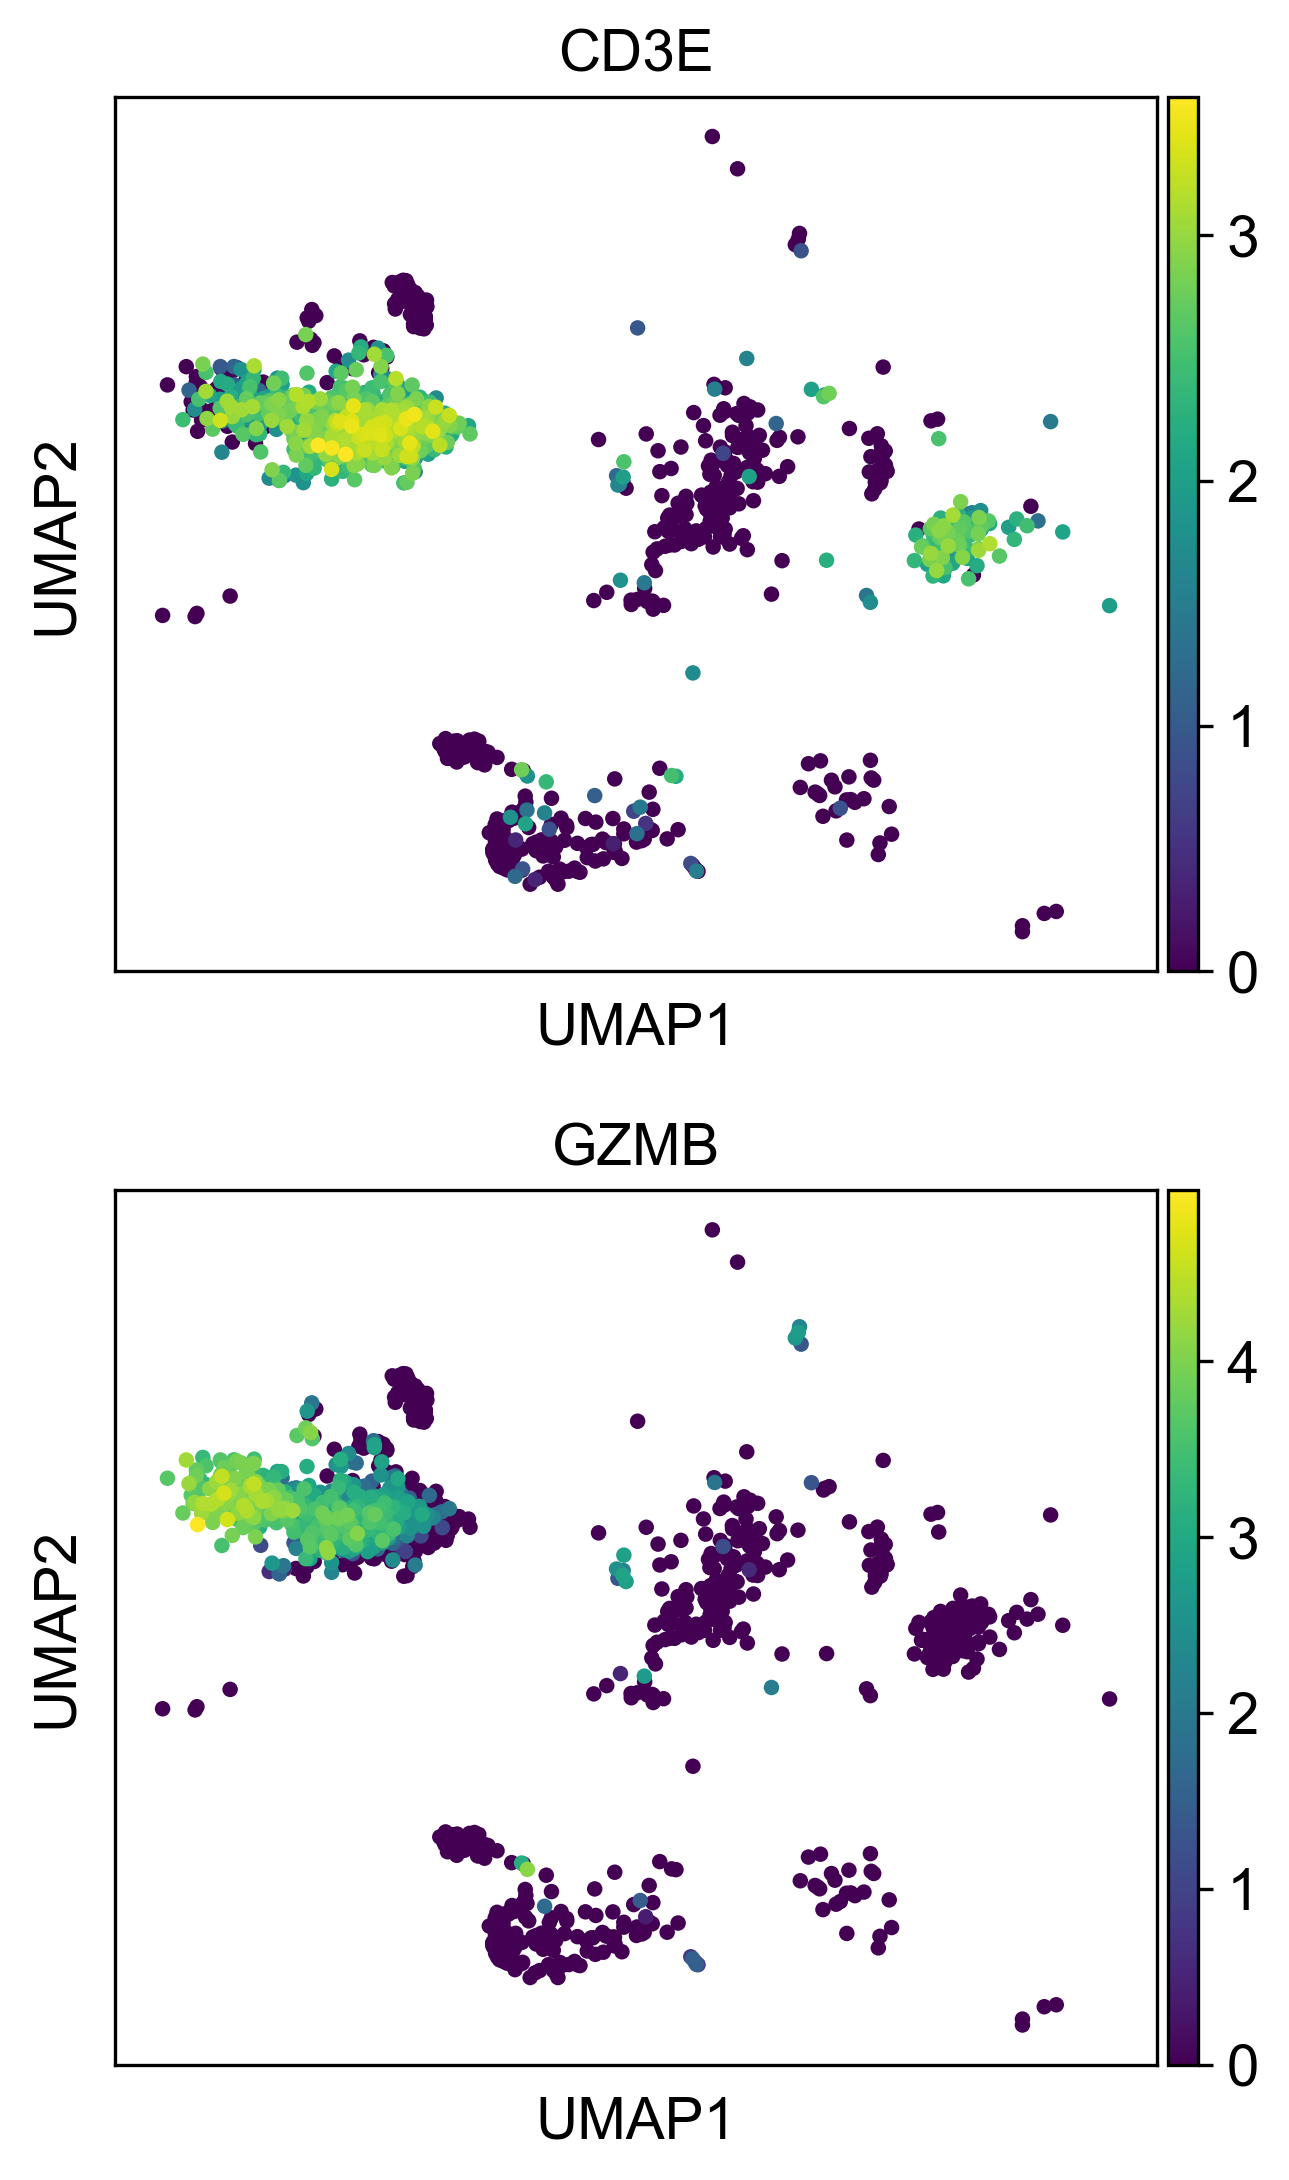

In [79]:
sc.pl.umap(adata1, color = is_nk, color_map = 'viridis', ncols = 1)

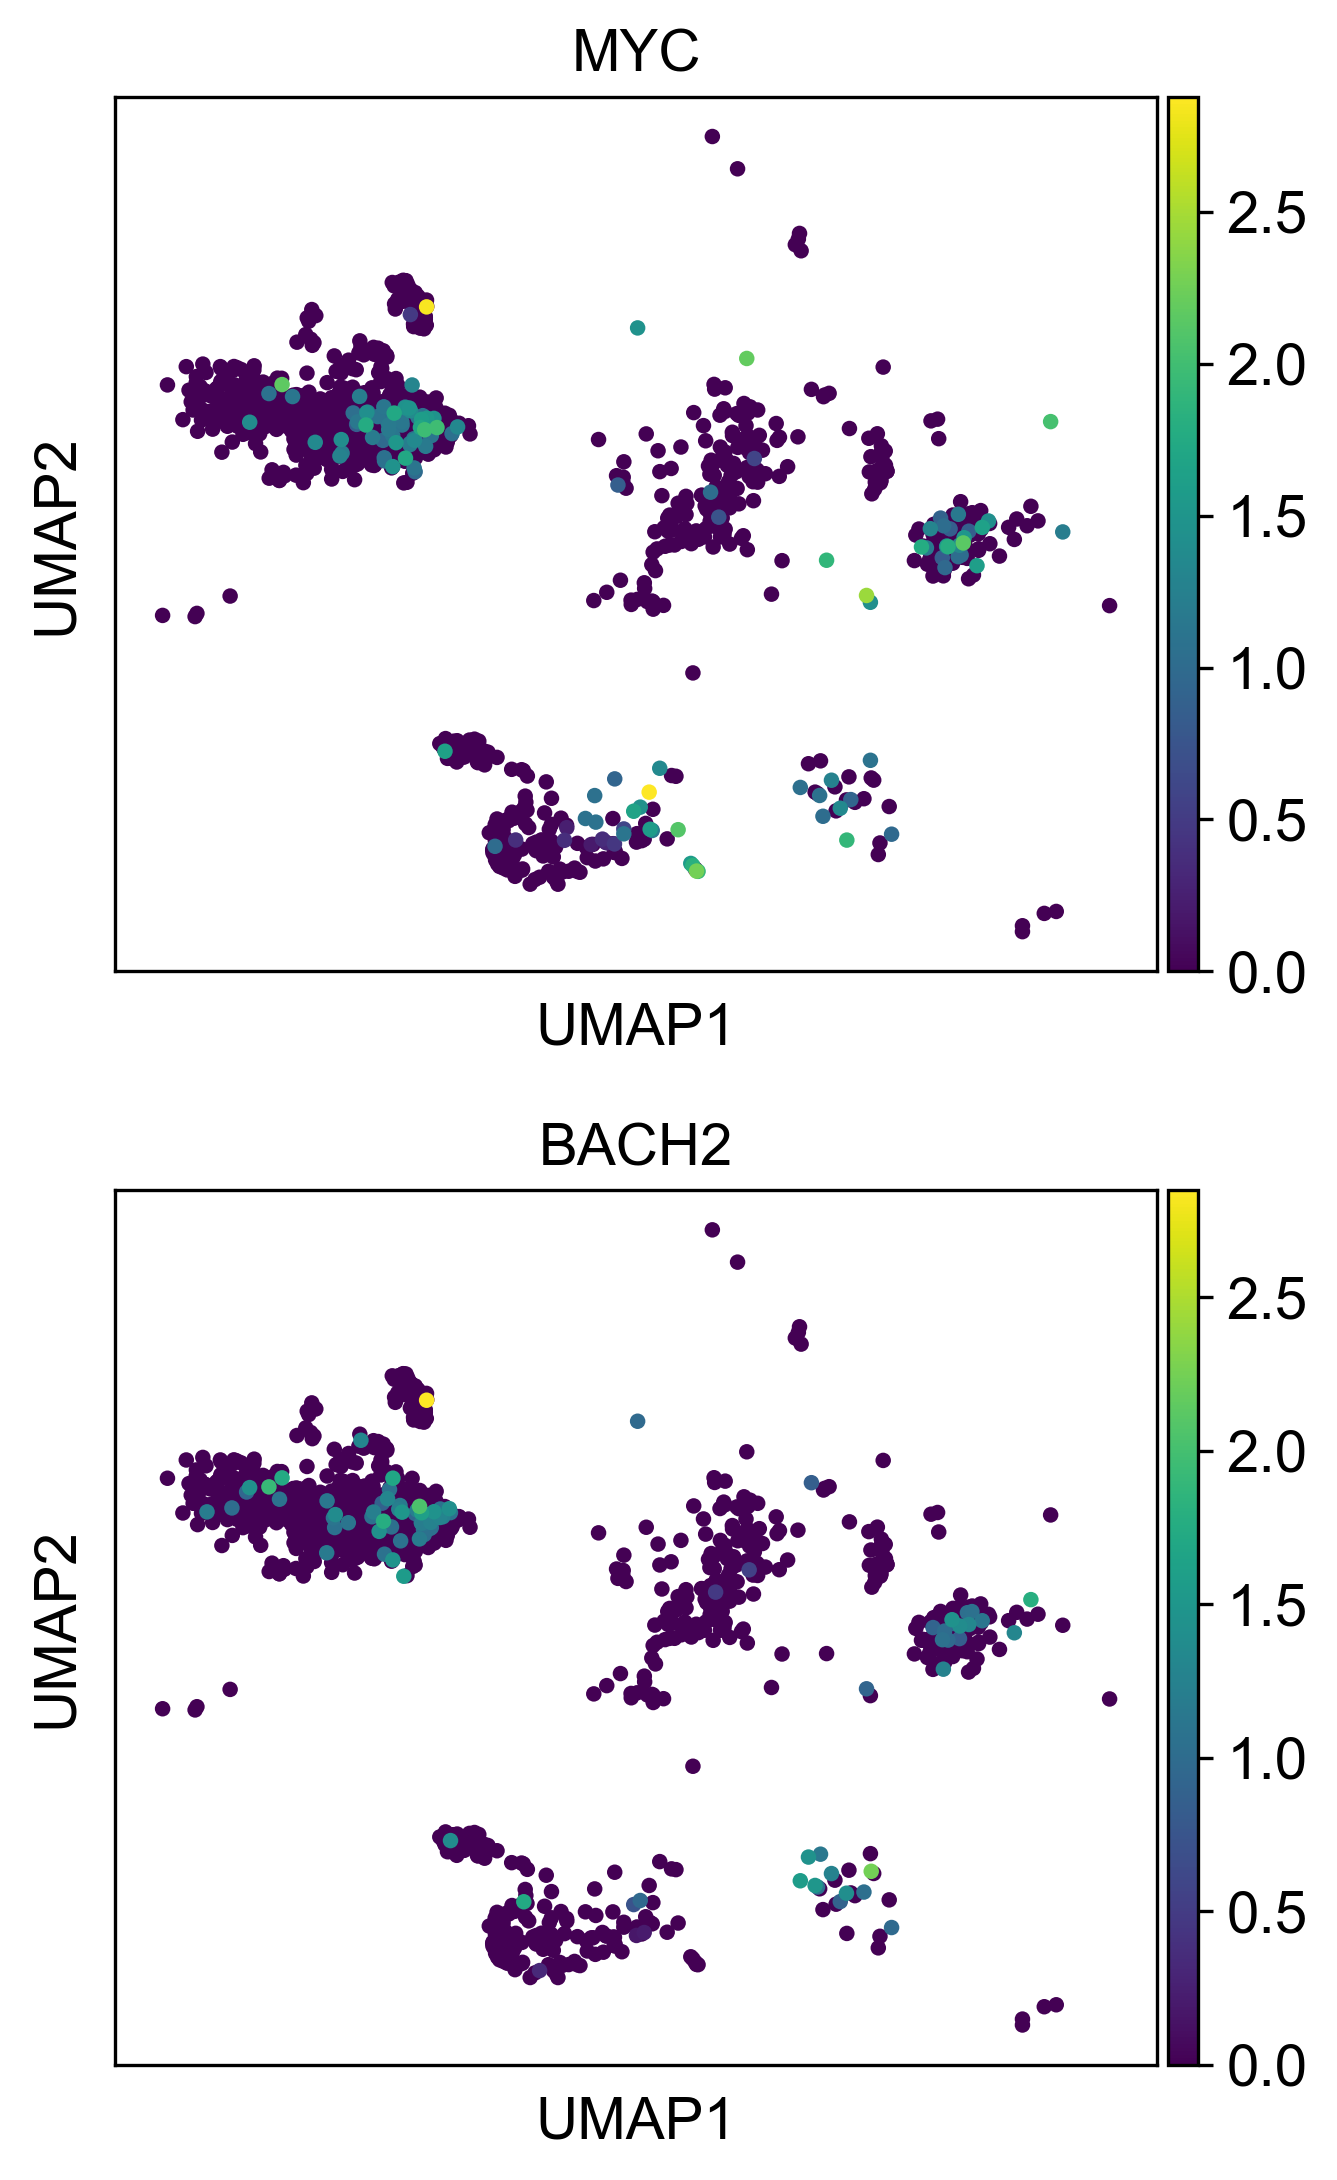

In [80]:
sc.pl.umap(adata1, color = nk_cd56_bright, color_map = 'viridis', ncols = 1)

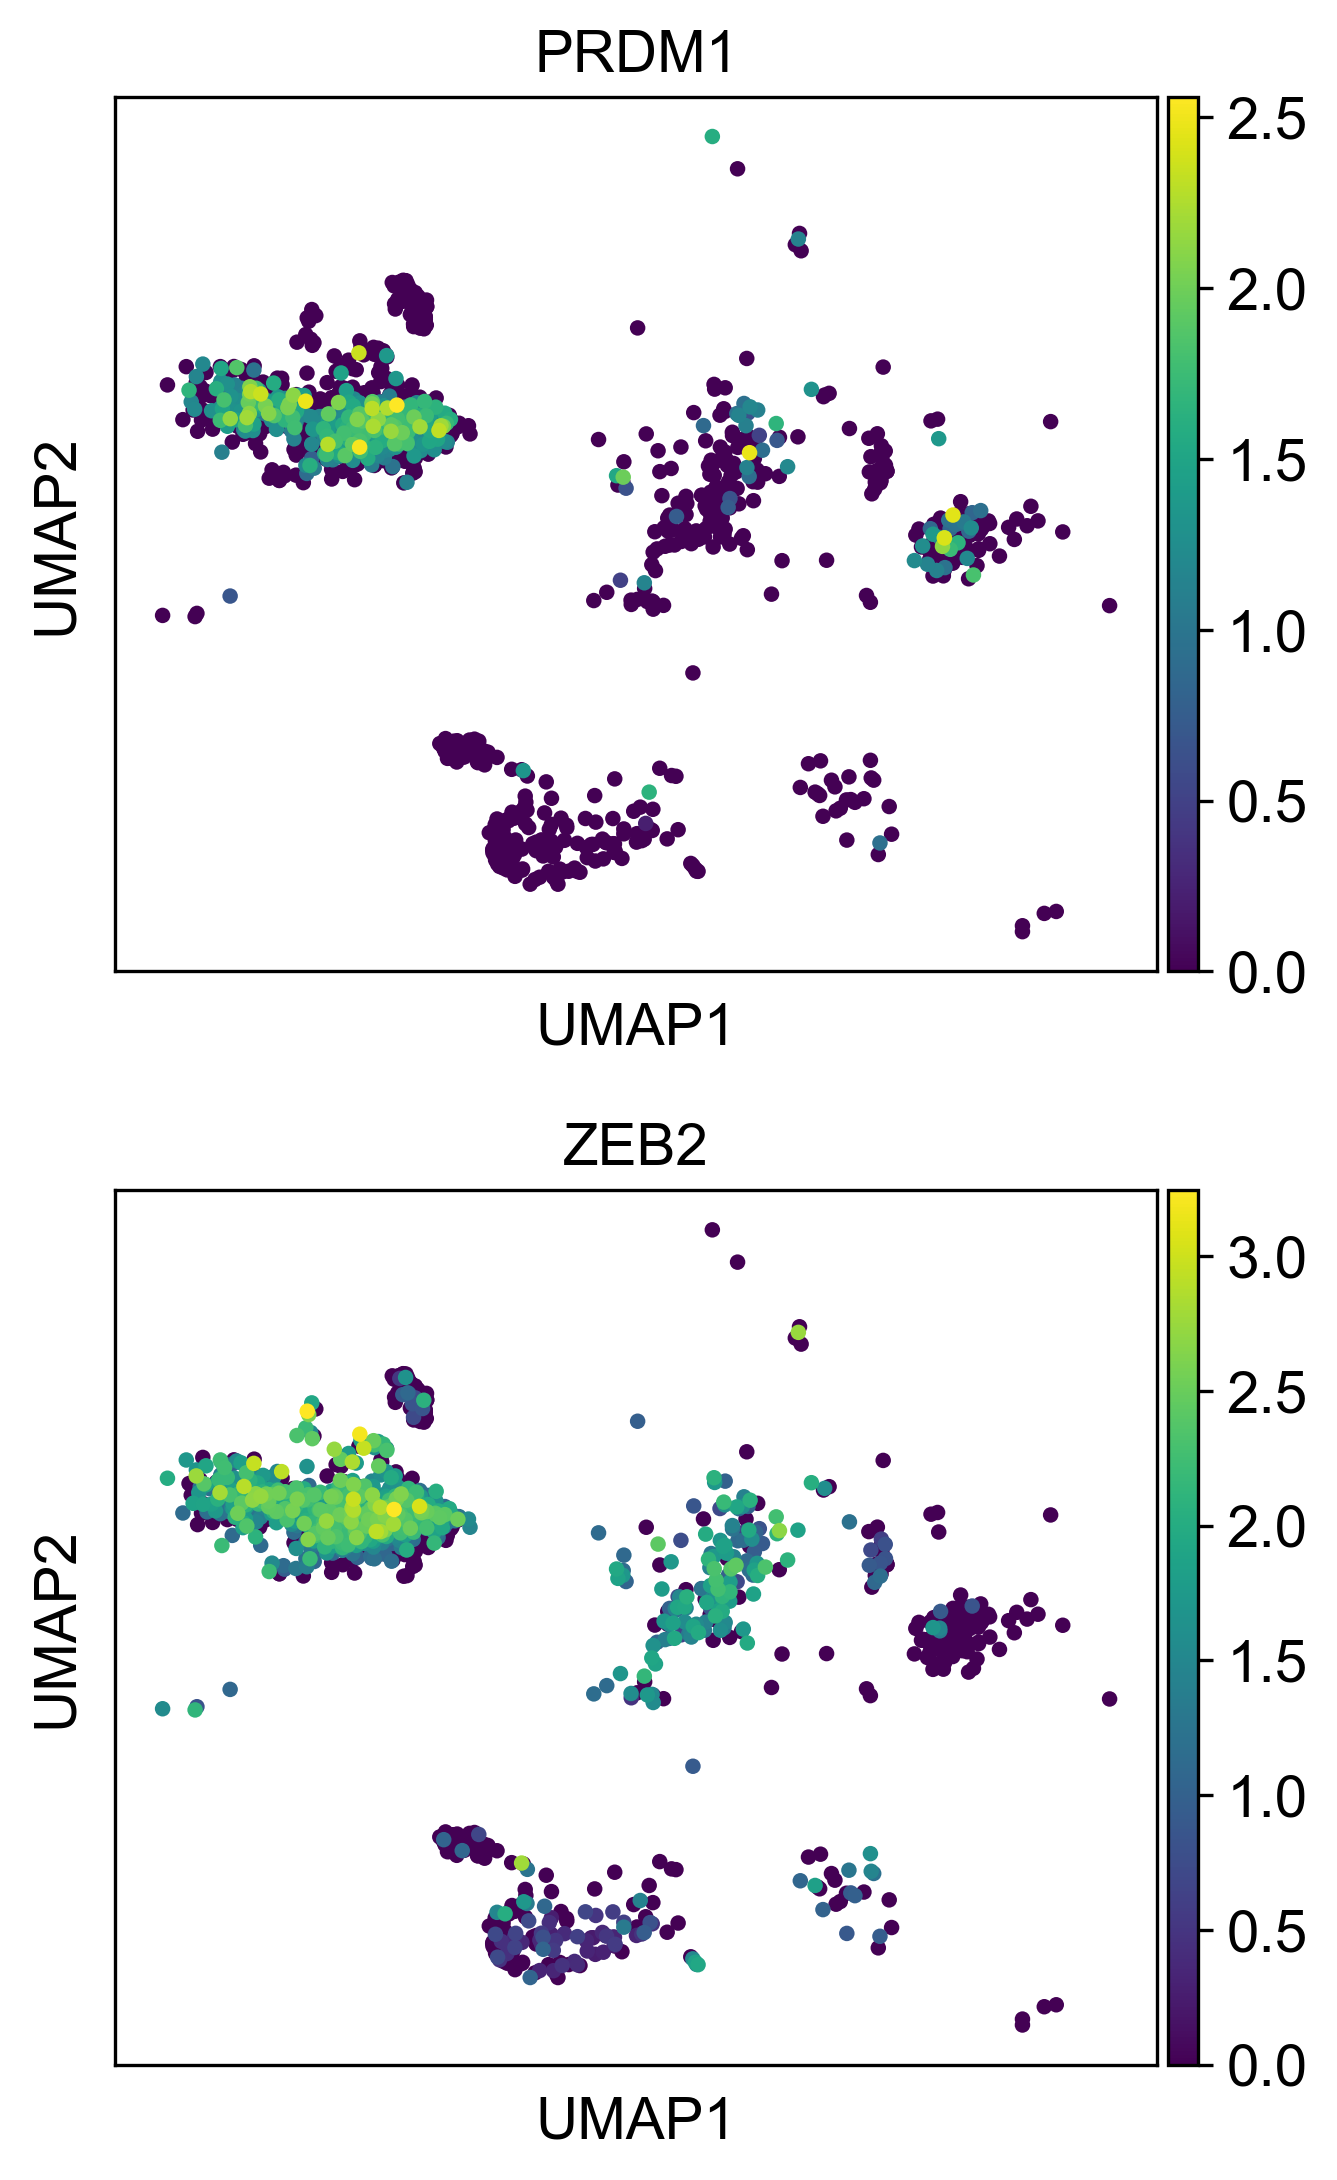

In [81]:
sc.pl.umap(adata1, color = nk_cd56_dim, color_map = 'viridis', ncols = 1)

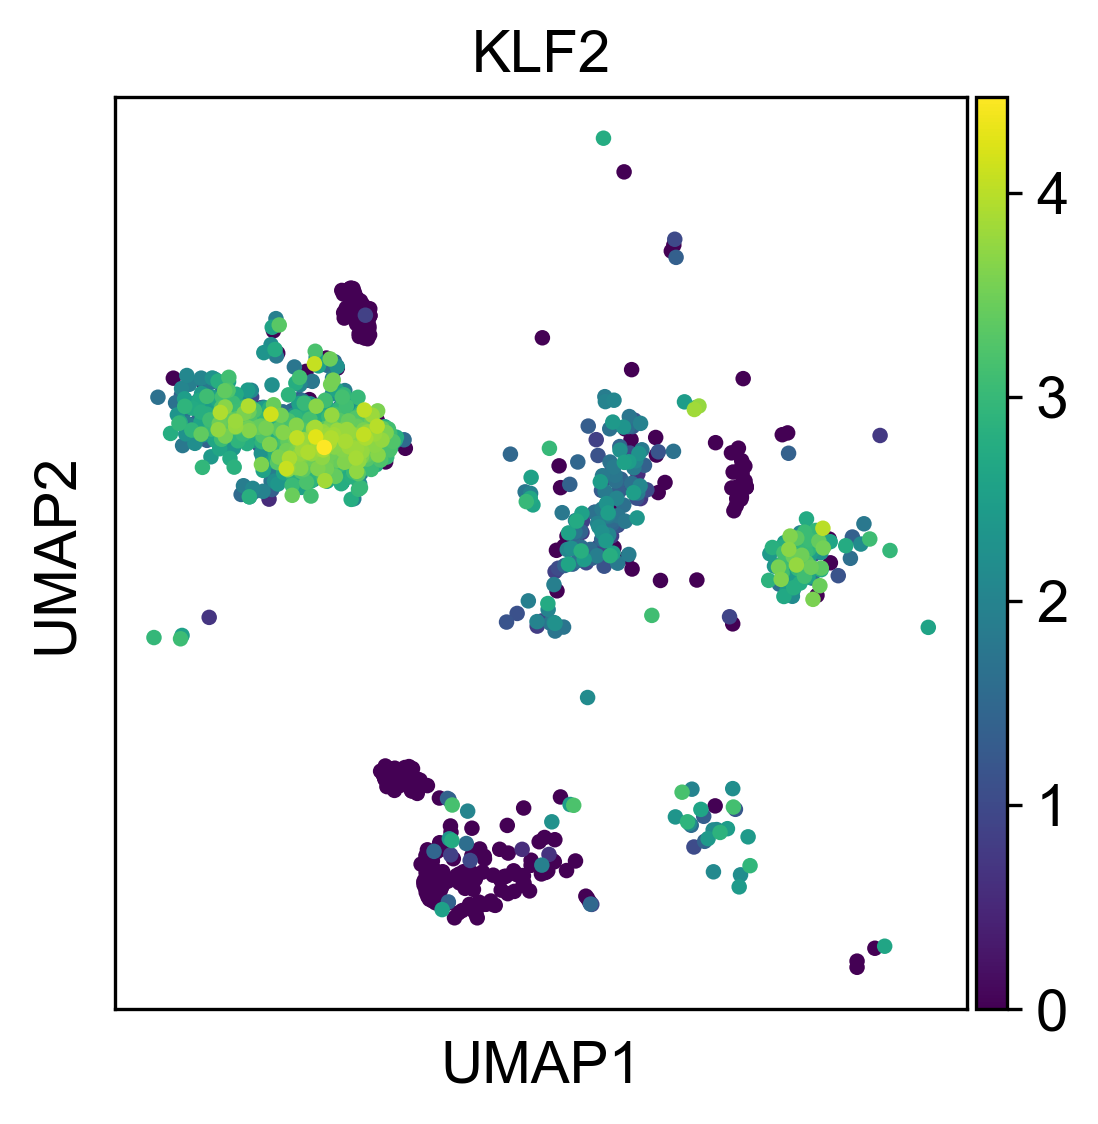

In [82]:
sc.pl.umap(adata1, color = nk_adaptive, color_map = 'viridis', ncols = 1)

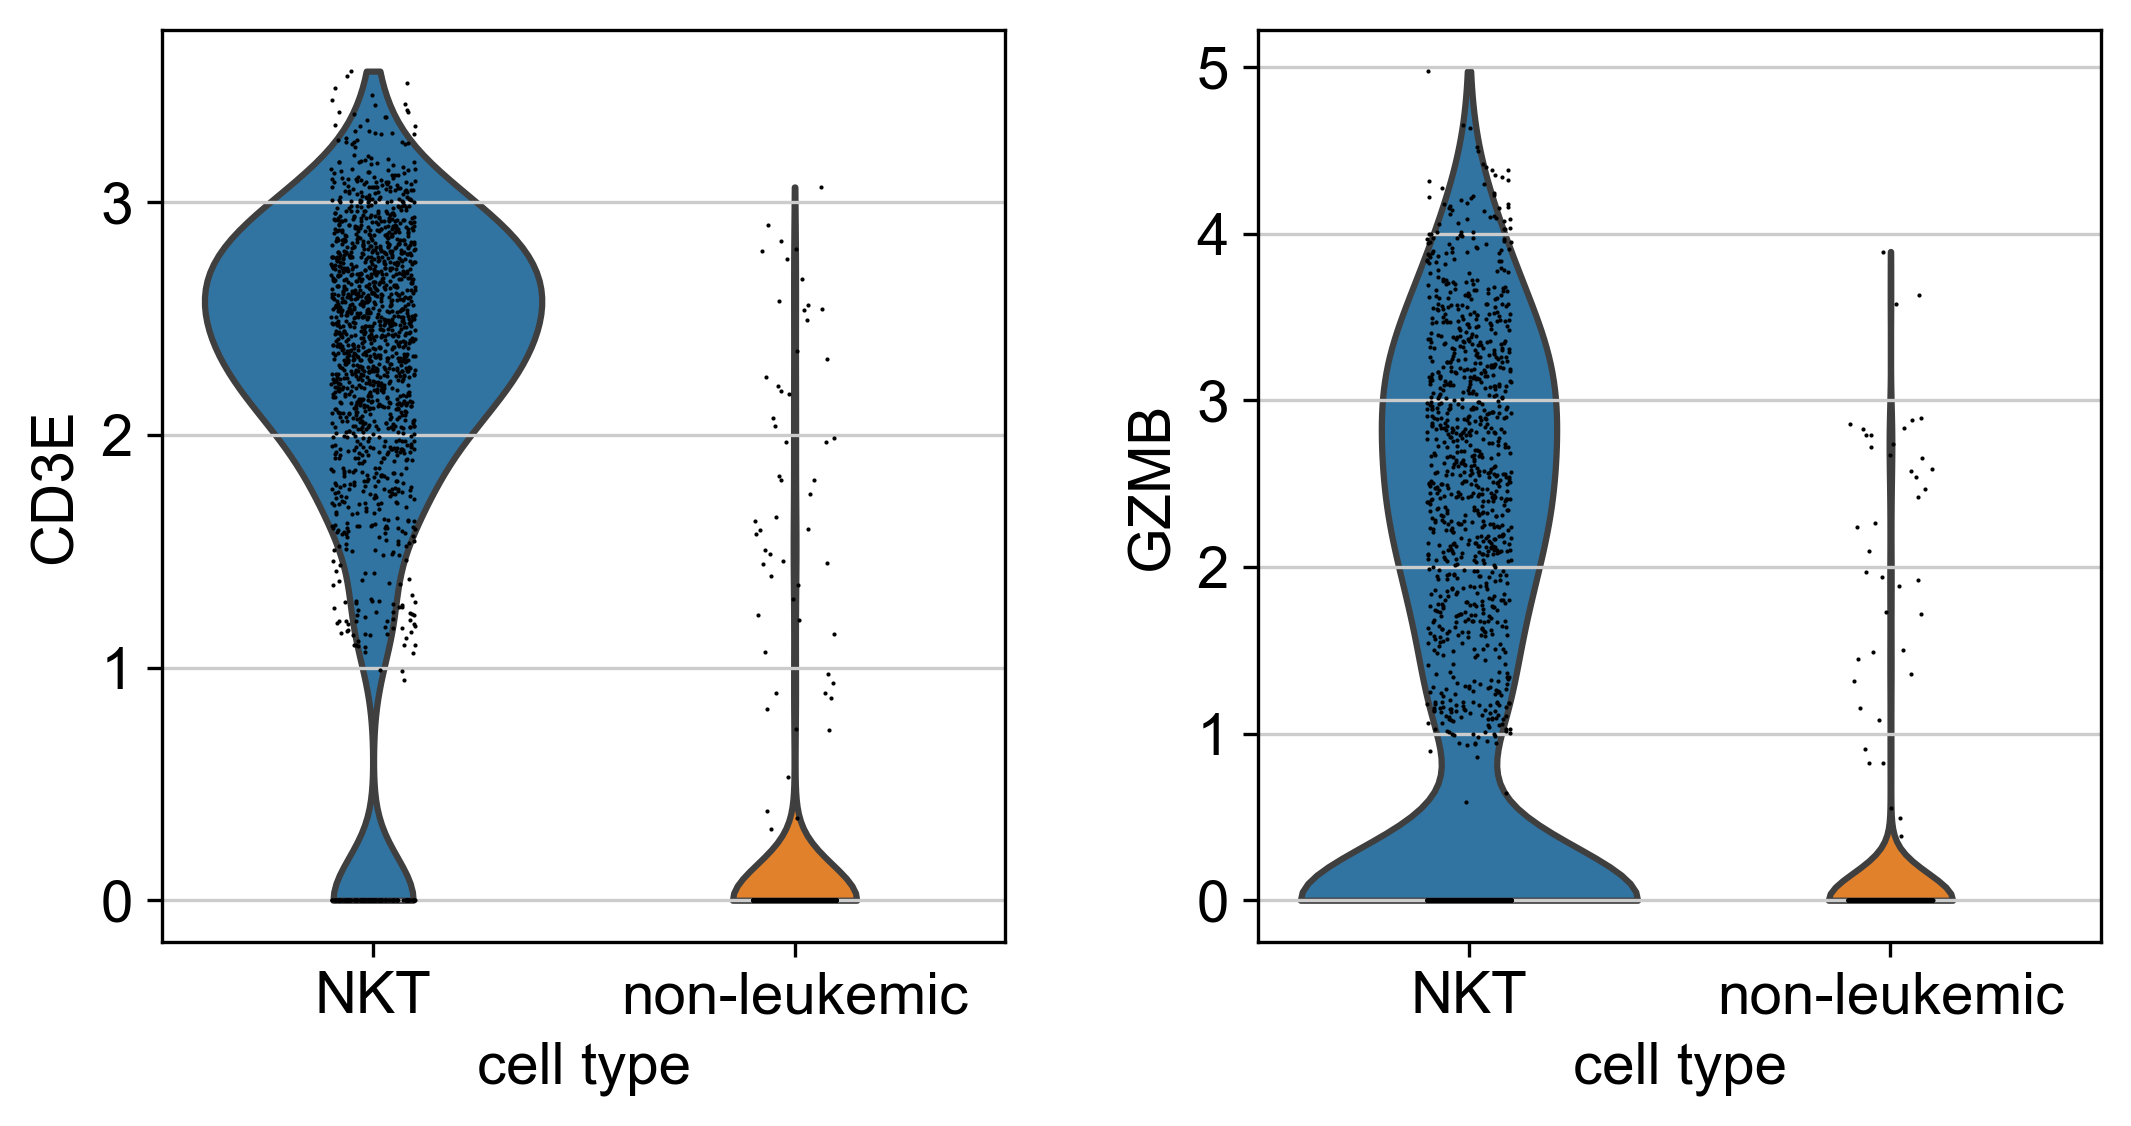

In [97]:
sc.pl.violin(adata, keys= is_nk, groupby= 'cell_type', scale = 'count')


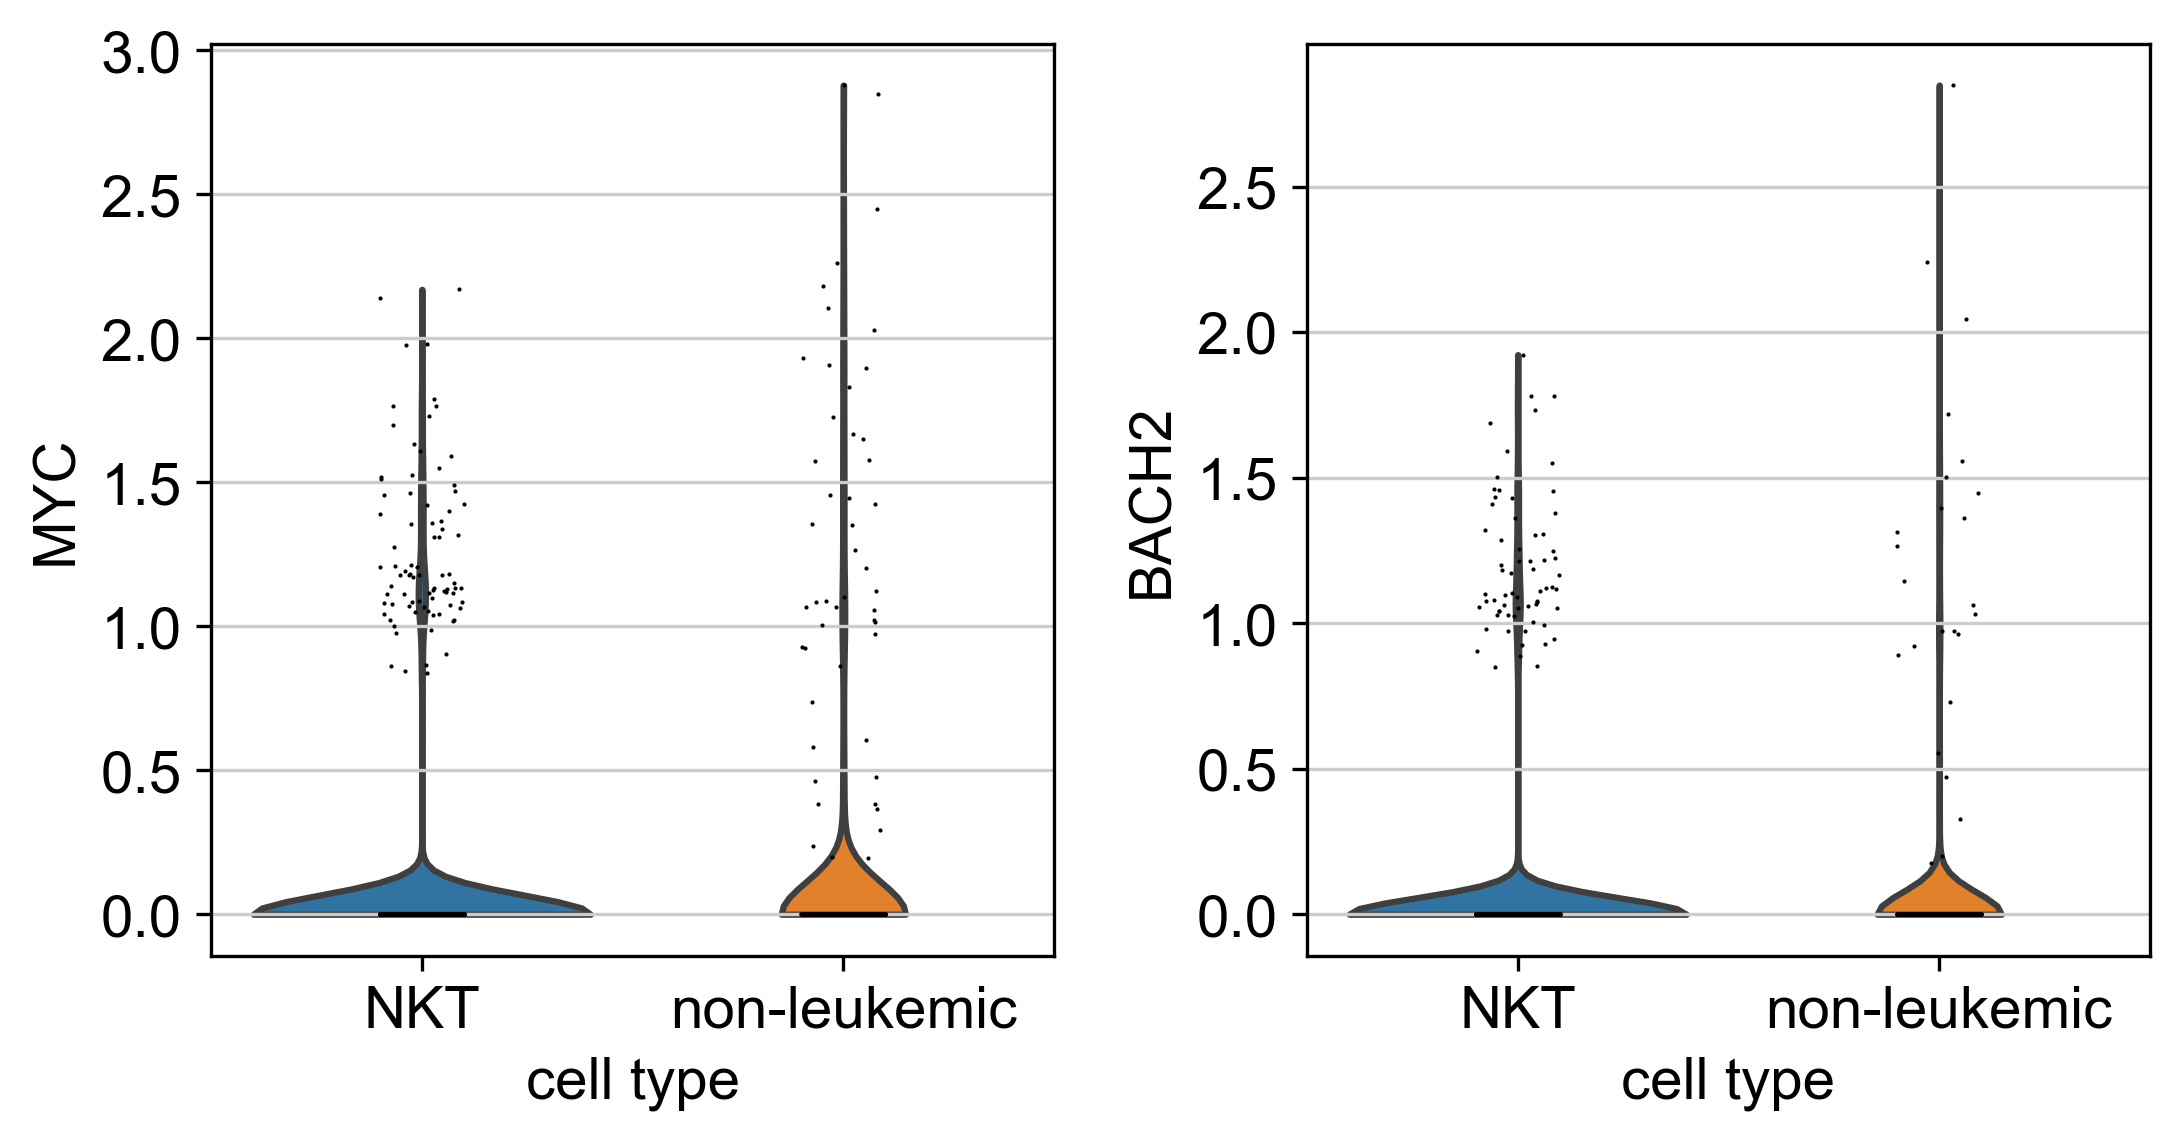

In [98]:
sc.pl.violin(adata, keys= nk_cd56_bright, groupby= 'cell_type', scale = 'count')


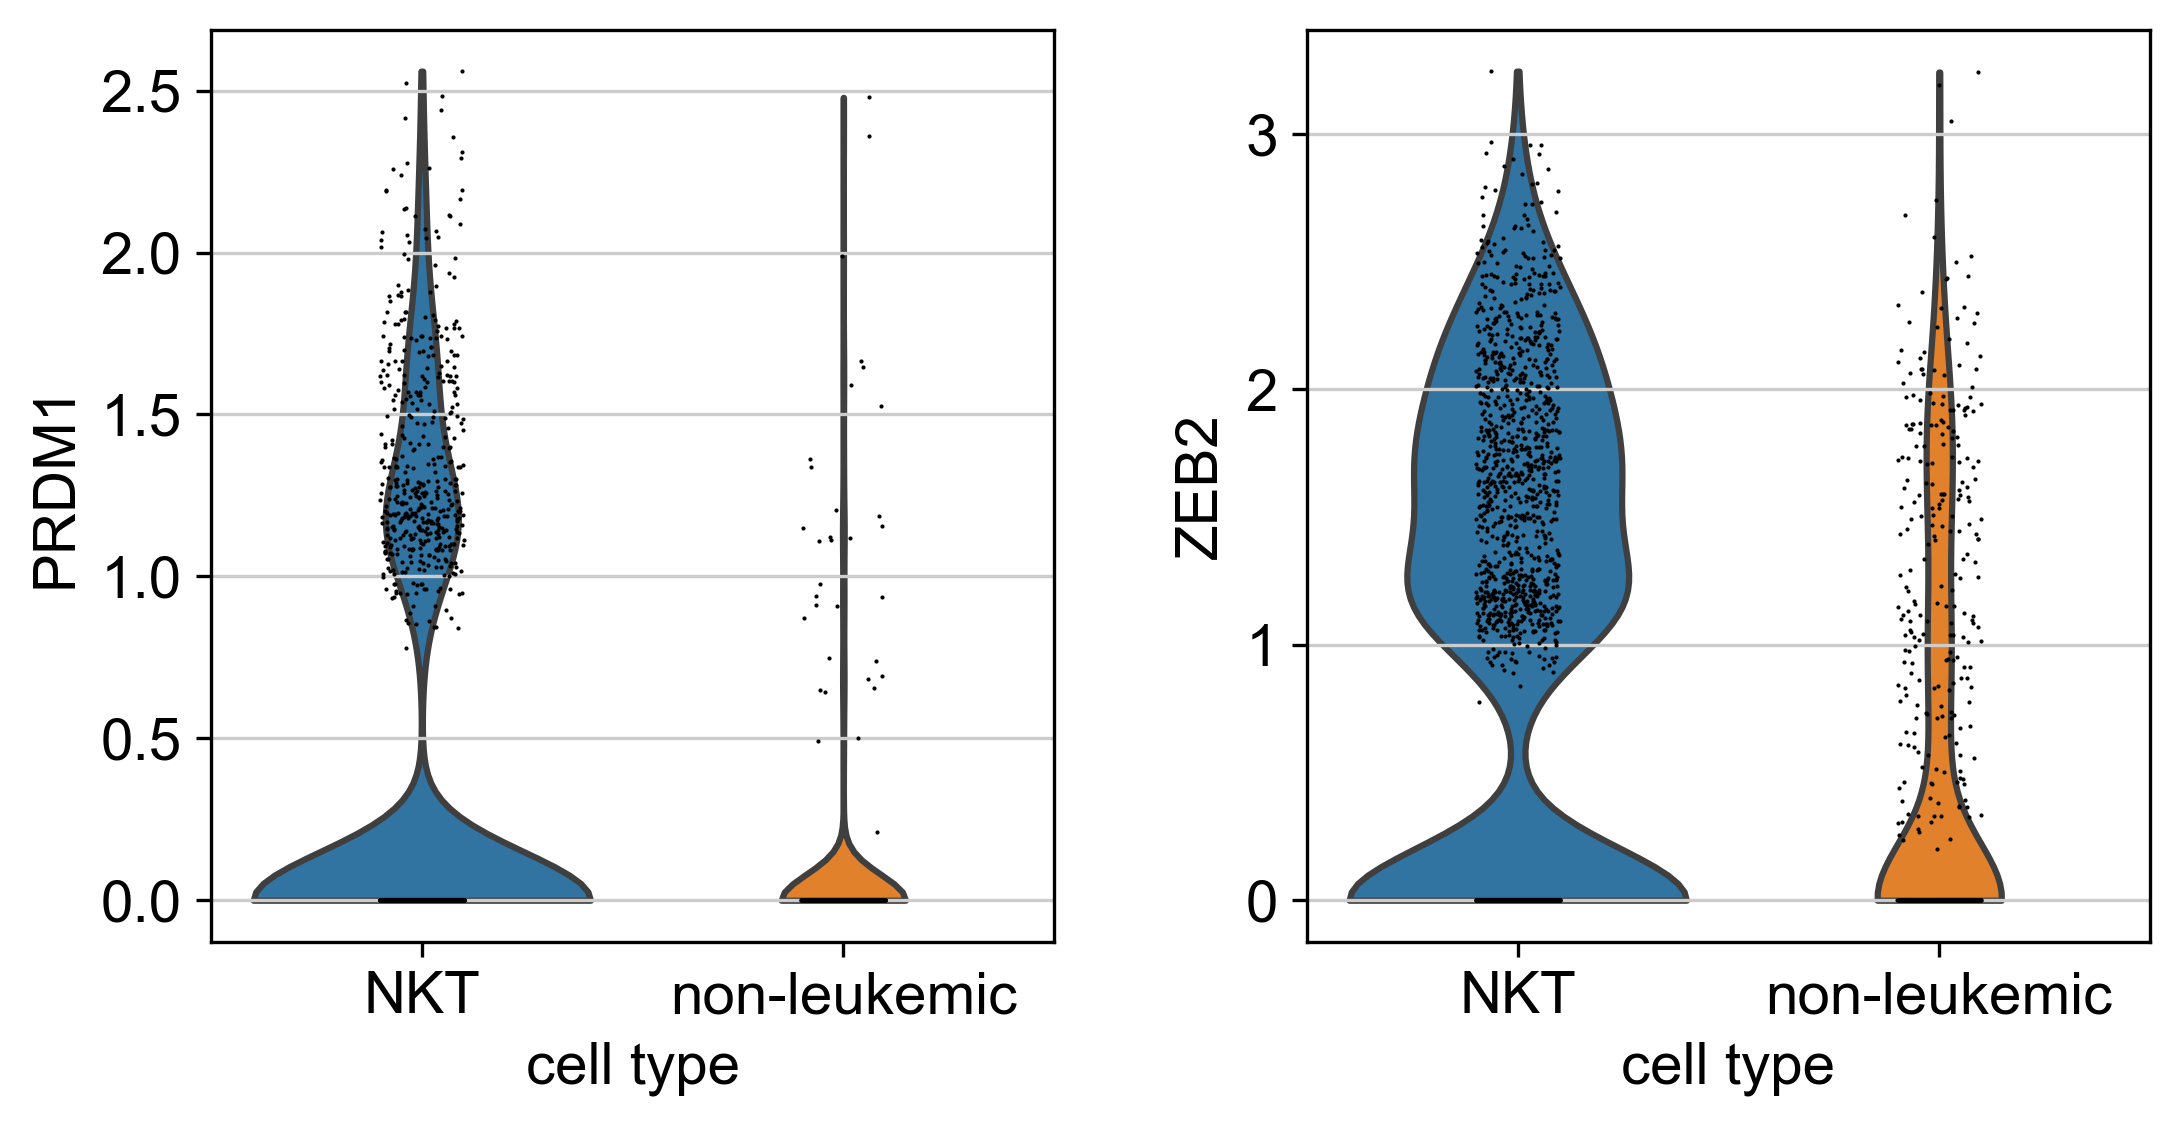

In [101]:
sc.pl.violin(adata, keys= nk_cd56_dim, groupby= 'cell_type', scale = 'count')



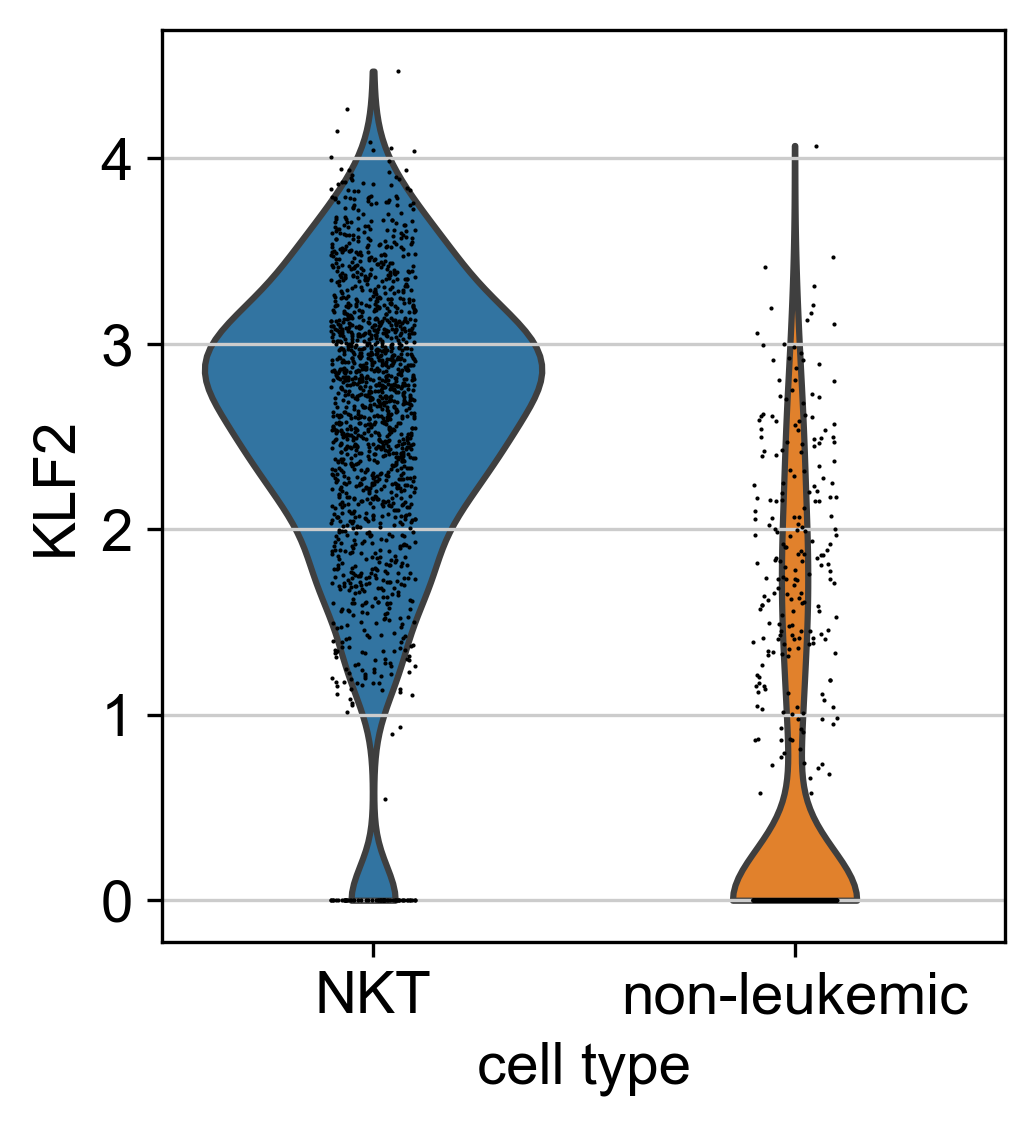

In [102]:
sc.pl.violin(adata, keys= nk_adaptive, groupby= 'cell_type', scale = 'count')

